In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [3]:
ticker = 'AAPL'  
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)

C:\Users\divya\AppData\Local\Temp\ipykernel_28188\3603964004.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
Failed to get ticker 'AAPL' reason: Failed to perform, curl: (6) Could not resolve host: query1.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
scaled_data

array([[0.08941488],
       [0.08595439],
       [0.08876307],
       ...,
       [0.98322826],
       [0.96665203],
       [0.95794834]], shape=(1258, 1))

In [7]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\Programming\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0244
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0014
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1826e-04
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3569e-04
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.5299e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8552e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2089e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.5931e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.6767e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0462e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.2735e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9901e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6919e-04
Epoch 15/20
15/15 ━━━━━━━━━

In [11]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 48.11370293344856
Unscaled Root Mean Squared Error (RMSE): 6.9364041789279085
Unscaled Mean Absolute Error (MAE): 5.671320660909017


In [14]:
shape = X_train.shape
print(f"Shape of training data: {shape}")

Shape of training data: (957, 60, 1)


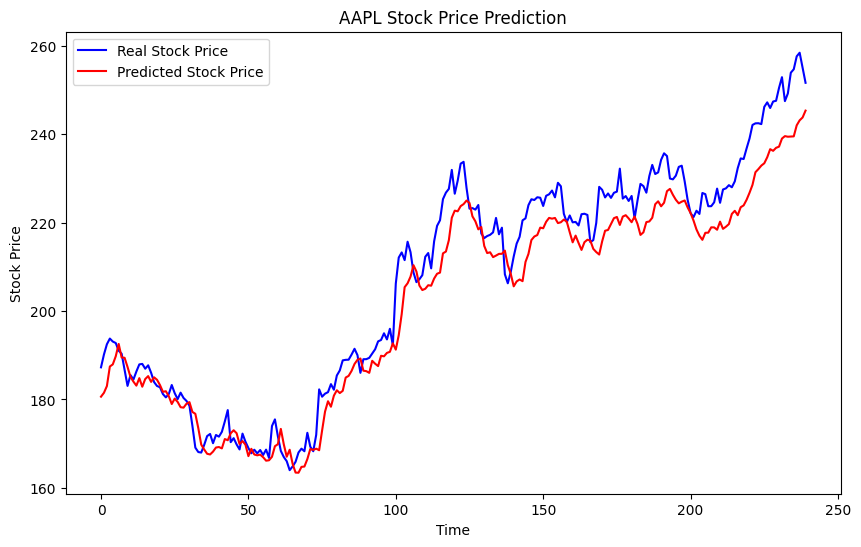

In [12]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()